In [37]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

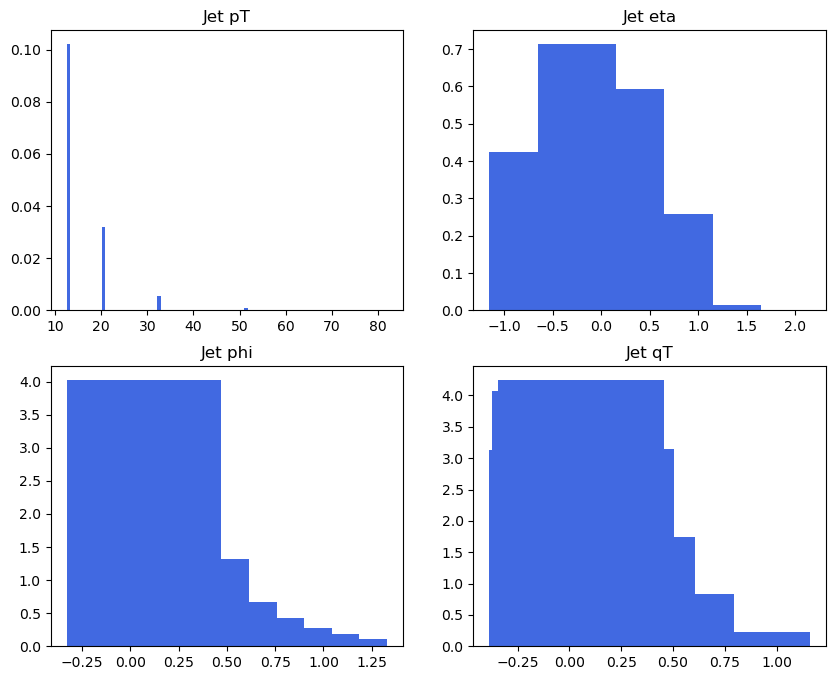

In [33]:
jet_features = ['pT','eta','phi','qT']
fig, axs = plt.subplots(2,2,figsize=(10,8))
axs = axs.ravel()
axs[0].set_title(jet_features[0])


for j,jet_feature in enumerate(jet_features):
    axs[j].set_title(f'Jet {jet_features[j]}')
    jet_files = glob.glob(f'Rapgap_unfolded*jet_{jet_features[j]}*plot_vals.npy')
    for jet_file in jet_files:
        jet_data = np.load(jet_file)
        axs[j].bar(jet_data[0],jet_data[1],color='royalblue')



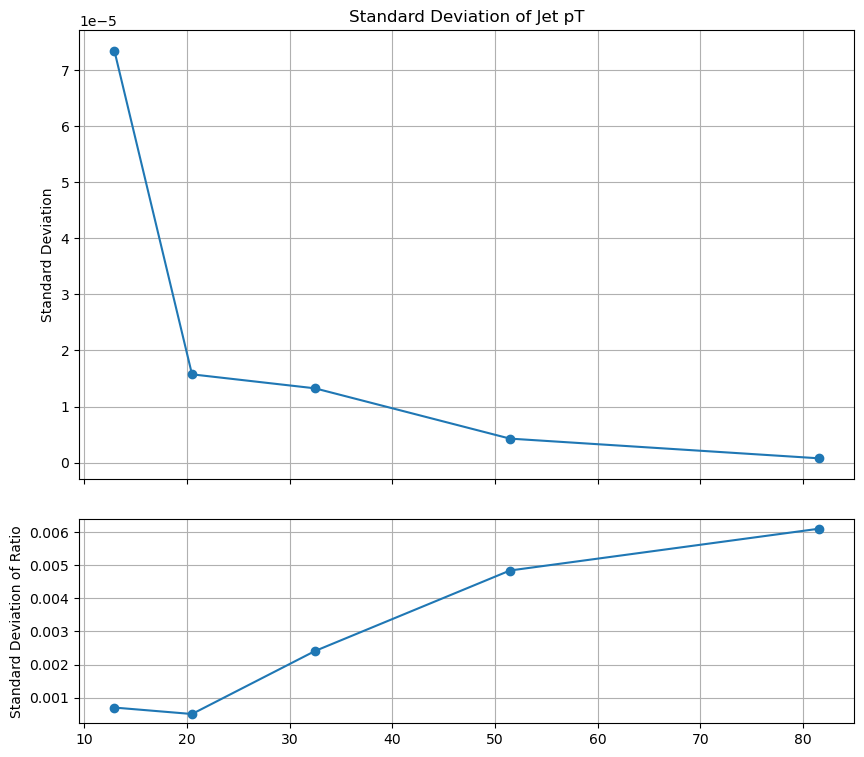

In [56]:
files = glob.glob('Rapgap_unfolded[0-4]jet_pT_ens[0-4]_plot_vals.npy')

# Load data from each file
data = [np.load(file) for file in files]

# Initialize a dictionary to hold lists of y-values for each x-value index
y_values_per_x_index = {}
ratio_values_per_x_index = {}
x_values = np.load(files[0])[0]  # Load the x-values from the first file

for single_file_data in data:
    for i, y in enumerate(single_file_data[1]):  # single_file_data[1] are the y-values
        if i not in y_values_per_x_index:
            y_values_per_x_index[i] = []
        y_values_per_x_index[i].append(y)

    for i, r in enumerate(single_file_data[2]):  # single_file_data[1] are the y-values
        if i not in ratio_values_per_x_index:
            ratio_values_per_x_index[i] = []
        ratio_values_per_x_index[i].append(r)


std_devs = [np.std(y_values) for y_values in y_values_per_x_index.values()]
ratio_std_devs = [np.std(y_values) for y_values in ratio_values_per_x_index.values()]

fig = plt.figure(figsize=(10, 9))
gs = gridspec.GridSpec(3, 1, figure=fig)

# Define the subplots; top plot takes up 3 parts, bottom plot takes up 1 part
ax1 = fig.add_subplot(gs[:2, 0])  # This is the top subplot
ax2 = fig.add_subplot(gs[2, 0],sharex=ax1)   # This is the bottom subplot

ax1.plot(x_values, std_devs, marker='o', linestyle='-')
ax1.set_title('Standard Deviation of Jet pT')
ax1.set_ylabel('Standard Deviation')
ax1.grid(True)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2.plot(x_values, ratio_std_devs, marker='o', linestyle='-')
ax2.set_ylabel('Standard Deviation of Ratio')
ax2.grid(True)

[[1.29244660e+01 2.04838981e+01 3.24647907e+01 5.14532258e+01
  8.15478672e+01]
 [1.02281694e-01 3.21003757e-02 5.45799243e-03 8.36571515e-04
  1.22625838e-04]
 [9.82465929e-01 1.04315405e+00 9.93632826e-01 9.48030564e-01
  9.88726084e-01]]
